In [ ]:
Name = "Kayla Kim"
Collaborators = "Ananya Gandhi, Natalia Forero"

In [69]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 2:  Forms of Error



## Question 1

Consider the expression
$$
    f(x) = \frac{1}{x - 1}
$$

**(a)** [10] Expand $f(x)$ in a Taylor series representation about $x_0 = 0$.

YOUR ANSWER HERE

The general formula for the Taylor Series expansion for f(x) about $x_0 = 0$ is given by:

\begin{equation}
\begin{split}
    T_N (x) & = \sum_{n=0} {\infty} f^{(n)}(x_0) \frac{(x-x_0)^n}{n!} \\
    & = f(x_0) + xf'(x_0) + \frac{x^2}{2!} f''(x_0) + ... + \frac{x^N}{N!} f^{(N)}(x_0)
\end{split}
\end{equation}

Since $f(x_0) = -1, f'(x_0) = -\frac{1}{(x_0-1)^2} = -1, f''(x_0) = \frac{2}{(x_0-1)^3} = -2, f'''(x_0) = -\frac{3!}{(x_0-1)^4} = -3!, ..., f^{(N)}(x_0) = -N! $, we find that 

\begin{equation}
\begin{split}
    T_N (x) & = -1 - x - x^2 - x^3 - ... - x^N
    & = - (1 + x + x^2 + ... + x^N)
    \end{split}
\end{equation}

**(b)** [5] What is the expected operation count if we truncate the series to $N$ terms?  Simplify the power to multiplications rather than something more exotic.  Stating the answer in terms of big-O notation is fine.

YOUR ANSWER HERE

The expected operation count for the series truncated to $N$ terms is $O(N^2)$ since 
there are N(N-1)/2 operations = O(N^2)
Using Horner's method, this becomes O(N) 

**(c)** [15] Make two plots of the relative error of the approximation vs. the true value of the function.  In the first pick a value to evaluate both functions at keeping $x_0 \neq x$ but vary the number of terms you keep ($N$).  In the second fix $N$ and vary $x$.  Explain what you observe.  

In [135]:
#function to calc taylor
def Tn(N, x):
    sum = -1 
    n = 1 
    
    while n < N:
        sum = sum * x - 1
        n += 1
    
    return sum 

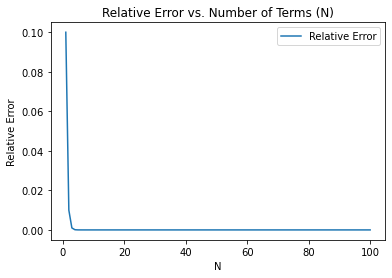

In [138]:
# Plot 1: (fix x, vary N) 

x_0 = 0.1
trueVal = 1 / (x_0 - 1)
N = numpy.linspace(1, 100, 101)
T_N = [Tn(number, x_0) for number in N]
error = [abs(computed - trueVal)/abs(trueVal) for computed in T_N]
actual = [trueVal]*len(N)

plt.plot(N, error, label="Relative Error")
plt.xlabel("N")
plt.ylabel("Relative Error")
plt.title("Relative Error vs. Number of Terms (N)")

plt.legend()
plt.show()
# raise NotImplementedError()

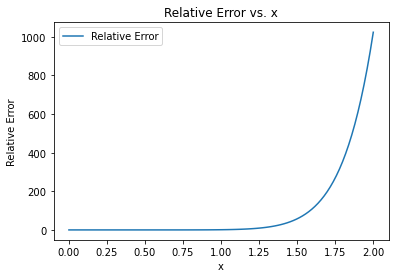

In [139]:
#Plot 2: (fix N, vary x) 
N = 10
x = numpy.linspace(0, 2, 100)
trueval = [(1 / (x_0 - 1)) for x_0 in x]
T_N = [Tn(N, x_0) for x_0 in x]
error = [abs(computed - actual)/abs(actual) for (computed, actual) in zip(T_N, trueval)]

#plt.plot(x, T_N, label= "Taylor Approximation")
plt.plot(x, error, label= "Relative Error")
#plt.plot(x, trueval, label="Actual Value")

plt.xlabel("x")
plt.ylabel("Relative Error")
plt.title("Relative Error vs. x")

plt.legend()
plt.show()

YOUR ANSWER HERE

## Question 2

**(a)** [5] Consider the following two equivalent sums:

$$
    \sum^\infty_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^\infty_{n=1} \frac{1}{n (n + 1)}
$$

Write two Python functions that compute each of these sums but to a finite number of terms $N$.

In [30]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    Sn = 0
    for n in range(1, N+1, 1):
        Sn += 1/n - 1/(n+1)
        
    return Sn


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    Sn = 0
    for n in range(1, N+1, 1):
        Sn += 1/(n*(n+1))
        
    return Sn

In [31]:
for N in range(5, 21, 5):
    numpy.testing.assert_allclose(sum_1(N), sum_2(N))
print("Success!")

Success!


**(b)** [5] Compute the absolute error between the two summation approaches.

In [48]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    f = sum_1(N)
    F = sum_2(N)
    error = numpy.abs(f-F)
    
    return error

In [49]:
N = numpy.logspace(1, 7, 7, dtype=int)
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.zeros(answer.shape), atol=1e-10)
print("Success!")

Success!


**(c)** [10] Plot the relative and absolute error versus $N$ up to large $N$ (above at least $10^4$).  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

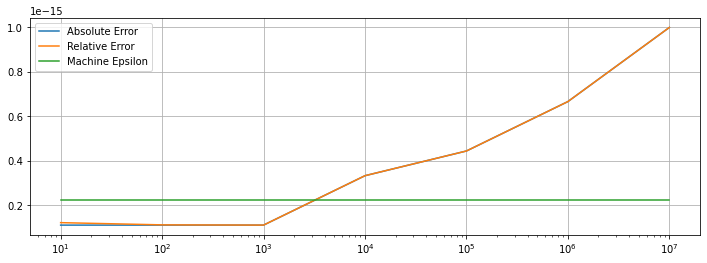

In [140]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

N = numpy.logspace(1, 7, 7, dtype=int)
abserr = [abs_error(n) for n in N]
relerr = [err/sum_1(n) for (err, n) in zip(abserr, N)]
epsilon = [numpy.finfo(float).eps for n in N]

plt.semilogx(N, abserr, label="Absolute Error")
plt.semilogx(N, relerr, label="Relative Error")
plt.semilogx(N, epsilon, label="Machine Epsilon")
plt.legend()
plt.grid()

plt.show()

**(d)** [5] Theorize what may have lead to the differences in answers.

YOUR ANSWER HERE

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** [10] Derive the upper bound on the *relative error* $r_n$ assuming that $0 < x$ and

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

YOUR ANSWER HERE

By Taylor's inequality, for a positive real number $M$ (aka the upperbound) such that $|f^{(n+1)}(x)| ≤ M$ for all $x$ such that $|x-a|≤d$, then the residual is given by
$$ r_n(x) ≤ \frac{M}{(n+1)!}|x-a|^{n+1}$$

In this case, the $(n+1)$ th derivative of $f(x) = e^x$, since $(f'(x) = 1 = f''(x) = ... = f^{(n)}(x) = f^{(n+1)}(x))$, and therefore the upper bound $M = 1$.

In other words, for $e^x-T_n(x) = \frac{e^cx^{n+1}}{(n+1)!}$, where $c \in (0,x)$
\begin{equation}
\begin{split}
    |e^x-T_n(x)| ≤ |e^x| \left| \frac{x^{n+1}}{(n+1)!} \right| \\
    r_n = \frac{|e^x-T_n(x)|}{|e^x|} ≤ \frac{x^{n+1}}{(n+1)!}
\end{split}
\end{equation}
(Since x > 0, simplified by removing absolute value)

**(b)** [10] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

YOUR ANSWER HERE

We are trying to show that for large x and n, $ \frac{x^{n+1}}{(n+1)!} ≤ \epsilon_{machine} \rightarrow n > exp(1) \cdot x$ where n is the number of terms in the series.
$$x^{n+1} < (n+1)!$$
(taking the log of both sides) 
\begin{equation}
\begin{split}
    (n+1) log(x) &< (n+1)log(n+1)-(n+1) \\
    log(x) &< log(n+1) - 1 \\
    log(x) + 1 &< log(n+1) \\
    log(x) + log(e) &< log(n+1) \\
\end{split}
\end{equation}

Using or large values of n, log(n+1) = log(n), so 
\begin{equation}
\begin{split}
    log(x) + log(e) &< log(n) \\
    log(e \cdot x) &< log(n) \\
\end{split}
\end{equation}

So finally, $$n > e \cdot x$$.


<!-- Let m be a natural number such that (m-1) ≤ x < m. Then for n > m, 
\begin{equation}
\begin{split}
    \frac{x^{n+1}}{(n+1)!} &= (\frac{x}{1} \cdot \frac{x}{2} \cdot ... \cdot \frac{x}{m-1} ) \cdot \frac{x}{m+1} ... \frac{x}{n+1}
    &= M(x) (\frac{x}{m})^{n-m}
\end{split}
\end{equation}

such that $M(x) = (\frac{x}{1} \cdot \frac{x}{2} \cdot ... \cdot \frac{x}{m-1} \cdot \frac{x}{m})$ and $s= \frac{x}{m} < 1$

Therefore, for $ \lim_{n\to\infty} s^{n-m} = 0$, there exists natural number N such that $\left| (\frac{x}{m})^{n-m} \right| < \epsilon$ for all $n ≥ N$. -->

**(c)** [10] Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [126]:
# HINT: Think about how we evaluated polynomials efficiently in class

import scipy.misc as misc

def Tn_exp(x, tolerance=1e-3):

    MAX_N = 100
    
    N = 0 
    Tn = 0 
    
    for n in range(0, MAX_N):
        result = numpy.ones(x.shape)
        counter = 0
        
        while (counter < n):
            result *= x
            if (n > counter):
                result /= (n - counter)
            result += 1
            counter += 1
            
        if(numpy.all(numpy.abs(result - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance)):
            N = n 
            Tn = result
            break 
    
    return Tn, N

In [127]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print("Success!")

Success!


## Question 4

[5] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


YOUR ANSWER HERE

Order of approximation for sum: $\mathcal{O}(\Delta x^4)$
\begin{equation}
\begin{split}
    cosh \Delta x + \frac{1}{1-\Delta x} &= 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4) + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)\\
    &= 2 + \Delta x + \frac{3}{2} \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)
\end{split}
\end{equation}

Order of approximation for the product: $\mathcal{O}(\Delta x^4)$
\begin{equation}
\begin{split}
     \frac{cosh \Delta x}{1-\Delta x} &= (1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4))(1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)) \\
     &= 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6) + \Delta x + \frac{\Delta x^3}{2!} + \frac{\Delta x^5}{4!} + \Delta x \mathcal{O}(\Delta x^6) + \Delta x^2 + \frac{\Delta x^4}{2!} + \frac{\Delta x^6}{4!} + \Delta x^2 \mathcal{O}(\Delta x^6) \\
     &  + \Delta x^3 + \frac{\Delta x^5}{2!} + \frac{\Delta x^7}{4!} + \Delta x^3 \mathcal{O}(\Delta x^6) + \mathcal{O}(\Delta x^4) + \frac{\Delta x^2}{2!} \mathcal{O}(\Delta x^4) + \frac{\Delta x^4}{4!} \mathcal{O}(\Delta x^4) + \mathcal{O}(\Delta x^4) \mathcal{O}(\Delta x^6) \\
     &= 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6) + \Delta x + \frac{\Delta x^3}{2!} + \frac{\Delta x^5}{4!} + \mathcal{O}(\Delta x^7) + \Delta x^2 + \frac{\Delta x^4}{2!} + \frac{\Delta x^6}{4!} + \mathcal{O}(\Delta x^8) \\
     & + \Delta x^3 + \frac{\Delta x^5}{2!} + \frac{\Delta x^7}{4!} + \mathcal{O}(\Delta x^9) + \mathcal{O}(\Delta x^4) + \mathcal{O}(\Delta x^6) + \mathcal{O}(\Delta x^8) + \mathcal{O}(\Delta x^4) \\
\end{split}
\end{equation}

The sum of big O terms is the smallest of the exponents. So, finally, 

$$
    \frac{cosh \Delta x}{1-\Delta x} = 1 + \Delta x + \frac{3}{2} \Delta x^2 + \frac{3}{2} \Delta x^3 + \mathcal{O}(\Delta x^4)
$$

## Question 5

Consider the operation
$$\begin{aligned}
    f(x,y) = \frac{1}{x + y}
\end{aligned}$$
for the following questions.

**(a)** [5] Estimate the relative error due to floating point approximations to the representation of the numbers assuming exact operations.

YOUR ANSWER HERE

Floating point error:
\begin{equation}
\begin{split}
    fl(\frac{1}{x+y}) &= \dfrac{1}{x(1+\delta_x)+y(1+\delta_y)} \\
    &= \dfrac{1}{x+y+x\delta_x+y\delta_y} \\
    &= \dfrac{1}{(x+y)(1+\dfrac{x\delta_x+y\delta_y}{x+y})} \\
\end{split}
\end{equation}

Relative Error: 
\begin{equation}
\begin{split}
    \dfrac{\dfrac{1}{x+y} - \dfrac{1}{(x+y)(1+\dfrac{x\delta_x+y\delta_y}{x+y})}}{\dfrac{1}{x+y}} \\
    = 1 - \dfrac{1}{(1+\dfrac{x\delta_x+y\delta_y}{x+y})}
\end{split}
\end{equation}
which simplifying becomes $$\dfrac{x\delta_x+y\delta_y}{x+y+x\delta_x+y\delta_y}$$

This is an example of catastrophic cancellation, since as it approaches 0 relative to the magnitudes of $x$ and $y$, the error becomes arbitrarily large. In other words, this is just $=\delta$.

**(b)** [5] Demonstrate this behavior by plotting the relative error.

In [62]:
dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
error = numpy.abs(( 1 / (x+y) ) - dx) / (dx)

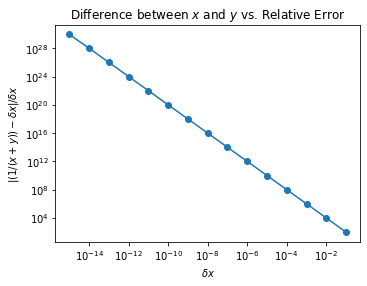

In [64]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 2)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\delta x$")
axes.set_ylabel("$| (1 / (x + y)) - \delta x| / \delta x$")
axes.set_title("Difference between $x$ and $y$ vs. Relative Error")

plt.show()